<a href="https://colab.research.google.com/github/ErnestoFCh/Simulacion-II/blob/main/Eficiencia_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Monte Carlo de la Media Muestral.

### Queremos calcular:
$$I=\int _{0}^{1}cos(\frac{\pi x}{2}) dx$$

Con: $$\theta_1=(b-a)\frac{1}{n} \sum_{i=1}^{n}g(X_i) \quad con \quad X_i\sim U(0,1) $$

$$y \quad g(x)=cos(\frac{\pi x}{2})$$

Donde $\theta_1$ es nuestro estimador.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.integrate as spi
import time
import pandas as pd

In [ ]:
a=0
b=1
N=500

In [ ]:
#Definimos g(x)
def f(x):
  return (np.cos(np.pi*x/2))

In [ ]:
def estimacion(N,a,b):
  gs=[]
  l=[]
  for i in range(N):
    U=np.random.uniform() #generamos un numero random
    X=a + U*(b-a)
    g=f(X)
    gs.append(g)
    suma=sum(gs)
    theta=(b-a)/(i+1)*suma #guardamos las probabilidades
    l.append(theta)


  return l

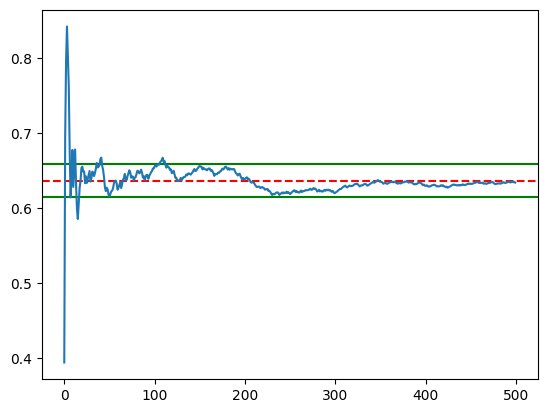

In [ ]:
G=estimacion(N,a,b)

media=np.mean(G) #calculamos la media de las medias de la muestra
desv=np.std(G)   #Calculamos el error estandar de la media


plt.axhline(media,color='r',linestyle='--') #media
plt.axhline((desv+media),color='g') #limite superior del intervalo
plt.axhline((-desv+media),color='g') #limite inferior del intervalo
plt.plot(G)
plt.show()

Estimamos un intervalo de confianza del 90% y dado que $n\geq 30$:
$$\bar{x}-z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\leq x\leq \bar{x}+z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$$

In [ ]:
# Calculando el valor crítico de la distribución
p=0.90

error_estandar = desv / (N**(1/2))
valor_critico = stats.norm.ppf((1 - p) / 2)

intervalo_inferior = media - valor_critico * error_estandar
intervalo_superior = media + valor_critico * error_estandar
#Intervalo de confianza
print(f"Intervalo de confianza del {p*100}%: ({intervalo_inferior}, {intervalo_superior})")

Intervalo de confianza del 90.0%: (0.6377883943106577, 0.634573767821569)


In [ ]:
N=50 #tamaño de la muestra

In [ ]:
def simulacion(M):
  r=[]
  for i in range(M):
    R=estimacion(N,a,b)
    r.append(R[-1])
  return r

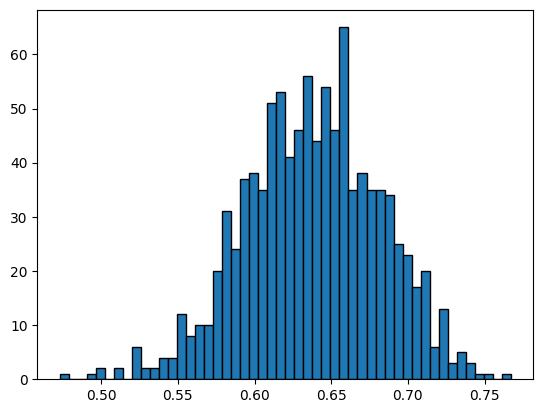

In [ ]:
start_time = time.time() #comienza hora de ejecucion
S1=simulacion(1000)
end_time = time.time() #registra hora de termino
t1 = end_time - start_time # Calcular el tiempo de ejecución
var1=np.var(S1)
plt.hist(S1, bins=50,edgecolor="black")
plt.show()

In [ ]:
MC_MediaM=np.mean(S1)
print(MC_MediaM)

0.637764760210457


#Metodo de Acierto y Error.



Queremos calcular:
$$I=\int _{0}^{1}cos(\frac{\pi x}{2}) dx$$
$$y \quad g(x)=cos(\frac{\pi x}{2})$$

Con:$$c=g(0)$$

Ademas: $$p=\frac{n}{N}$$
$$n: \text{numero de aciertos}$$
$$N: \text{Numero de experimentos}$$
Donde $p$ estima la integral.

In [ ]:
def estimacion2(N,a,b):
  l=[]

  c=f(a)  #dado que la funcion esta acotada, esta alcanza su maximo en el limite inferior
  n=0
  for i in range(N):
    U1=np.random.uniform()
    U2=np.random.uniform()
    X=a + U1*(b-a)
    g=f(X)


    if g>c*U2: #condicion de exitos
      n+=1     #numero de exitos
      theta=(c*(b-a))*(n/((i+1))) #Guardamos probabilidades
      l.append(theta)
  return l

##Grafica de la funcion.

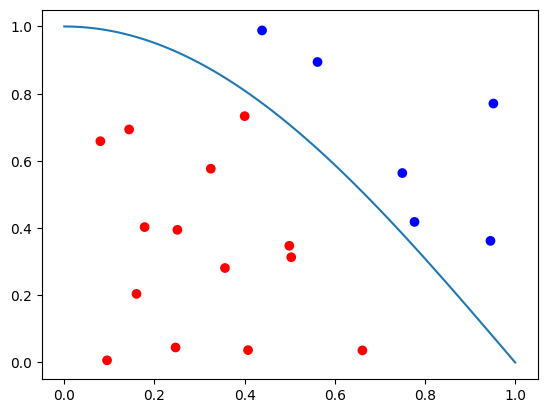

In [ ]:
# Puntos aleatorios
U1 = np.random.uniform(size=20)
U2 = np.random.uniform(size=20)

# Evaluamos la función en U1
y_values = f(U1)

# Compara U2 con los valores de la función
colors = ["red" if u2 < y else "blue" for u2, y in zip(U2, y_values)]

# Grafica la función
x = np.linspace(0, 1, 100)
plt.plot(x, f(x), label=r"$\sqrt{\arctan(x)}$")

# Gráfico de dispersión con colores diferentes
plt.scatter(U1, U2, color=colors)

In [ ]:
N=500

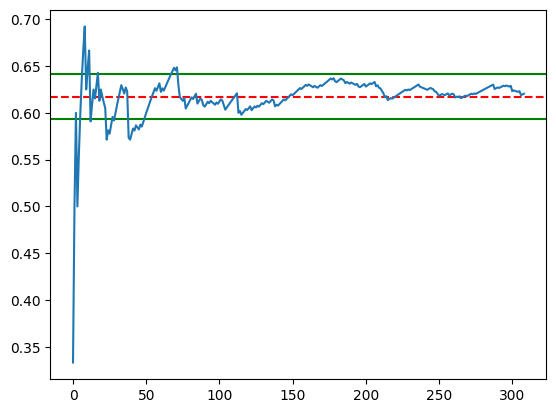

In [ ]:
G=estimacion2(N,a,b)

media=np.mean(G) #calculamos la media de las medias de la muestra
desv=np.std(G)   #Calculamos el error estandar de la media
#Graficamos un intervalo de confianza de un error estandar
plt.axhline(media,color='r',linestyle='--') #media
plt.axhline((desv+media),color='g') #limite superior del intervalo
plt.axhline((-desv+media),color='g') #limite inferior del intervalo
plt.plot(G)
plt.show()

Estimamos un intervalo de confianza del 90%:
$$\bar{x}-z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\leq x\leq \bar{x}+z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$$

In [ ]:
# Calculando el valor crítico
p=0.90
error_estandar = desv / (N**0.5)
valor_critico = stats.norm.ppf((1 - p) / 2)

intervalo_inferior = media - valor_critico * error_estandar
intervalo_superior = media + valor_critico * error_estandar
#Intervalo de confianza
print(f"Intervalo de confianza del {p*100}%: ({intervalo_inferior}, {intervalo_superior})")

Intervalo de confianza del 90.0%: (0.6191832412256905, 0.61567639738027)


In [ ]:
N=50

In [ ]:
def simulacion2(M):
  r=[]
  for i in range(M):
    R=estimacion2(N,a,b)
    r.append(R[-1])
  return r

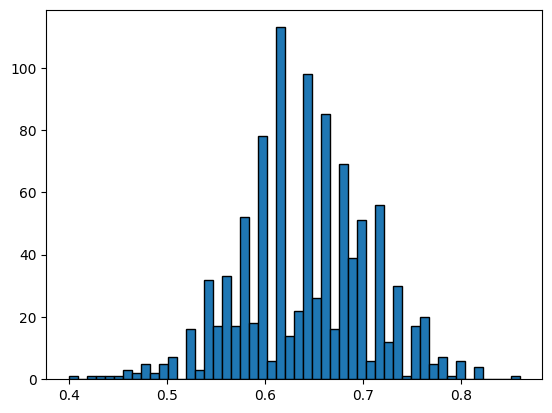

In [ ]:
start_time = time.time()
S2=simulacion2(1000)
end_time = time.time()
t2 = end_time - start_time # Calcular el tiempo de ejecución
var2=np.var(S2)
plt.hist(S2, bins=50,edgecolor="black")
plt.show()

In [ ]:
MC_AciertoE=np.mean(S2)
print(MC_AciertoE)

0.6420201558720929


##Metodo de Muestreo importancia
# Queremos calcular:
$$I=\int _{a}^{b}f(x) dx=\int _{a}^{b} \frac{f(x)}{g(x)} · g(x)dx$$

Con: $$con \quad X_i\sim U(0,1) $$

$$y \quad g(x)=1-x^2$$
Generamos numeros aleatorios para g(x) con: $$G(x)= \frac{3x(1-x)}{2}$$
Estimando: $$I=\frac{1}{n}\sum_{i=1}^{n}{\frac{f(x)}{g(x)}}$$



In [ ]:
def g(x):
  return (3/2)*(1-x**2)

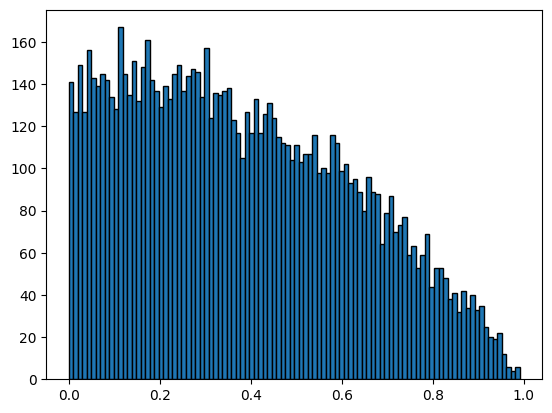

In [ ]:
#generamos numeros aleatorios que generen g(x)

def MR(N):
  lista=[]
  while len(lista)<N:      #este while sirve para llenar la lista con N elementos
    U1=np.random.uniform()
    U2=np.random.uniform()
    g1=g(U2)
    if U1<g1/1.5:
      lista.append(U2)

  return lista


F=MR(10000)
plt.hist(F, bins=100,edgecolor="black")
plt.show()

In [ ]:
#Definimos g(x)
def f(x):
  return (np.cos(np.pi*x/2))

In [ ]:
N=500
a=0
b=1

In [ ]:
def estimacion3(N,a,b):
  gs=[]
  l=[]
  for i in range(N):
    lista = MR(1) #generamos un numero random
    U = float(lista[0])
   # X=a + U*(b-a)
    F=f(U)
    G=g(U)
    gs.append(F/G)
    suma=sum(gs)
    theta=((1)/(i+1))*suma #guardamos las probabilidades
    l.append(theta)


  return l

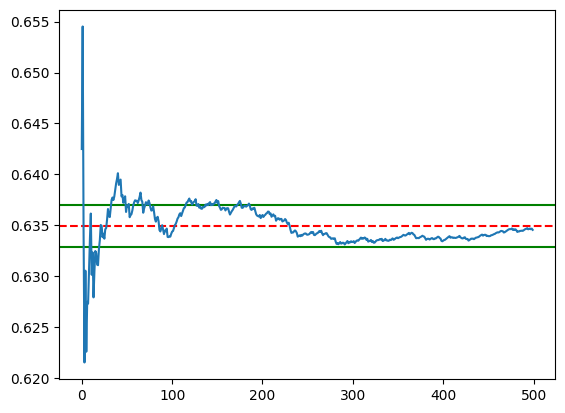

In [ ]:
G=estimacion3(N,a,b)

media=np.mean(G) #calculamos la media de las medias de la muestra
desv=np.std(G)   #Calculamos el error estandar de la media


plt.axhline(media,color='r',linestyle='--') #media
plt.axhline((desv+media),color='g') #limite superior del intervalo
plt.axhline((-desv+media),color='g') #limite inferior del intervalo
plt.plot(G)
plt.show()

Estimamos un intervalo de confianza del 90%:
$$\bar{x}-z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\leq x\leq \bar{x}+z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$$

In [ ]:
# Calculando el valor crítico
p=0.90
error_estandar = desv / (N**0.5)
valor_critico = stats.norm.ppf((1 - p) / 2)

intervalo_inferior = media - valor_critico * error_estandar
intervalo_superior = media + valor_critico * error_estandar
#Intervalo de confianza
print(f"Intervalo de confianza del {p*100}%: ({intervalo_inferior}, {intervalo_superior})")

Intervalo de confianza del 90.0%: (0.6350476214414642, 0.6347446792530578)


In [ ]:
N=50

In [ ]:
def simulacion3(M):
  r=[]
  for i in range(M):
    R=estimacion3(N,a,b)
    r.append(R[-1])
  return r

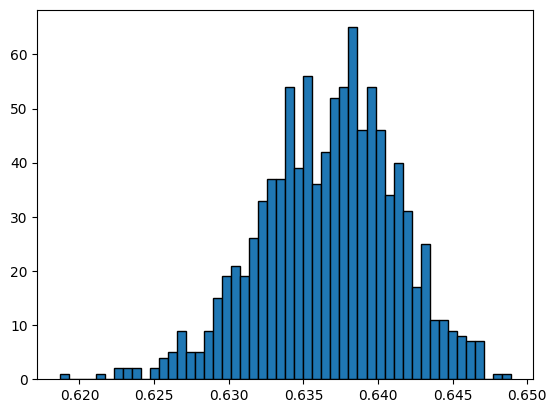

In [ ]:
start_time = time.time()
S3=simulacion3(1000)
end_time = time.time()
t3 = end_time - start_time # Calcular el tiempo de ejecución
var3=np.var(S3)
plt.hist(S3, bins=50,edgecolor="black")
plt.show()

In [ ]:
MC_MU_IM=np.mean(S3)
print(MC_MU_IM)

0.636683310555039


##Comparacion de los metodos


In [ ]:
print("Tiempo de ejecucion para n=1000")
print("MC MEdia muestral: ",t1)
print("MC Acierto error: ",t2)
print("MC Muestreo Importancia: ",t3)

Tiempo de ejecucion para n=1000
MC MEdia muestral:  0.33455657958984375
MC Acierto error:  0.4265611171722412
MC Muestreo Importancia:  0.695380449295044


In [ ]:
print("Simulamos 1000 veces con muestras de 50")
eficiencia={
    "Metodo":["MC Media muestral","MC Acierto error","MC Muestreo Importancia"],
    "MC Media muestral":[var1/var1,var1/var2,var1/var3],
    "MC Acierto error":[var2/var1,var2/var2,var2/var3],
    "MC Muestreo Importancia":[var3/var1,var3/var2,var3/var3]
    }
df1=pd.DataFrame(eficiencia)
styled_df = df1.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('border', '1px solid black')]},
     {'selector': 'tbody td', 'props': [('border', '1px solid black')]}]
).hide(axis='index')
styled_df

Simulamos 1000 veces con muestras de 50


Metodo,MC Media muestral,MC Acierto error,MC Muestreo Importancia
MC Media muestral,1.000000,2.310933,0.010530
MC Acierto error,0.432726,1.000000,0.004556
MC Muestreo Importancia,94.970891,219.471343,1.000000


In [ ]:
datos= {
    "Metodo":["MC Media muestral","MC Acierto error","MC Muestreo Importancia"],
    "Estimacion":[MC_MediaM,MC_AciertoE,MC_MU_IM]
}
df2=pd.DataFrame(datos).style.hide(axis='index')
df2

Metodo,Estimacion
MC Media muestral,0.637765
MC Acierto error,0.642020
MC Muestreo Importancia,0.636683
